# Introduction to Initial Data Analysis

Initial Data Analysis (IDA) consists of steps performed on the data of a study typically between the end of the data collection point.  IDA starts of those statistical analyses that address "research questions". It is important to detect the issues, then dealing with data issues as early as possible.  

The output should contain the simplify of data collection with data summary report. 

- Created Date : **10/4/2022**
- Updated Date : **14/4/2022**
- Author       : KK Yong

**References:**
- [Using Dictionary in Python](https://realpython.com/python-dicts/)
- [Handling Nested Dictionary](https://www.programiz.com/python-programming/nested-dictionary)
- [OrderedDict in Python](https://www.geeksforgeeks.org/ordereddict-in-python/)
- [Using Pandas Series](https://pythonbasics.org/pandas-series/)
- [MultiIndex / advanced indexing](https://pandas.pydata.org/docs/user_guide/advanced.html)

# Initialization for Python and NILMTK

Let's kick-off to process and analysis the data with Python.

In [2]:
import dateutil
import warnings

import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime

import nilmtk as ntk

## Define constant and global variable

In [3]:
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

RAW_FILENAME = "../../../ukdale/ukdale.h5"

START_TS ='2013-04-01 00:00:00'
END_TS='2013-04-01 12:00:00'

## Overview of UK-DALE Dataset

In [4]:
# Load dataset
ukdale = ntk.DataSet(RAW_FILENAME)

In [5]:
# Print metadata
ntk.utils.print_dict(ukdale.metadata)

### Access the Dictionary of Key-Value Pair Vs List

In [6]:
print("\nList of Keys at the top level, total {} items.".format(len(list(ukdale.metadata))))
print(list(ukdale.metadata))

print("\nList of Keys inside the 'meter_devices' sublevel")
print(list(ukdale.metadata['meter_devices']))

print("\nList of Keys inside the 'timeframe' sublevel")
print(list(ukdale.metadata['timeframe']))

print("\nShow values of 'description', which at top level")
print(ukdale.metadata['description'])

print("\nList of Keys inside the 'timeframe' sublevel")
print("Data type of timeframe is {}".format(type(ukdale.metadata['timeframe'])))
print(list(ukdale.metadata['timeframe'].values()))


List of Keys at the top level, total 20 items.
['contact', 'creators', 'date', 'description', 'description_of_subjects', 'funding', 'geo_location', 'geospatial_coverage', 'institution', 'long_name', 'name', 'number_of_buildings', 'publisher', 'related_documents', 'rights_list', 'schema', 'subject', 'timeframe', 'timezone', 'meter_devices']

List of Keys inside the 'meter_devices' sublevel
['CurrentCostTx', 'EcoManagerWholeHouseTx', 'EcoManagerTxPlug', 'SoundCardPowerMeter']

List of Keys inside the 'timeframe' sublevel
['end', 'start']

Show values of 'description', which at top level
Appliance-by-appliance and whole-home power demand for 5 UK homes. Appliance power demand was recorded once every 6 seconds. Whole-home power demand was recorded once every 6 seconds for all homes and additionally at 16kHz for homes 1, 2 and 5. Detailed metadata is included.

List of Keys inside the 'timeframe' sublevel
Data type of timeframe is <class 'dict'>
['2017-04-26T18:35:53+01:00', '2012-11-09T22

###  Detect branches of DICT - "ukdale.metadata"

In [7]:
cnt = 0
tmplst_dict = list()
d = ukdale.metadata
for e in d:
    if type(d[e]) is dict:
        cnt += 1
        tmplst_dict.append(d[e])
        print("{} - Data Type is {}.".format(e,type(e)))
#    else:
#        print("{} - Data Type is {}.".format(e,type(e)))

print("\nLength of dict in list = {}.".format(len(tmplst_dict)))
for item in tmplst_dict:
    #if type(subitem) is dict:
    #print("{} - Data Type is {}.".format(item, type(item)))
    print("...{} - {}".format(len(item) ,type(item)))
    for subitem in item:
        print("{} - Data Type is {}.".format(subitem, type(item[subitem])))

geo_location - Data Type is <class 'str'>.
timeframe - Data Type is <class 'str'>.
meter_devices - Data Type is <class 'str'>.

Length of dict in list = 3.
...4 - <class 'dict'>
country - Data Type is <class 'str'>.
latitude - Data Type is <class 'float'>.
locality - Data Type is <class 'str'>.
longitude - Data Type is <class 'float'>.
...2 - <class 'dict'>
end - Data Type is <class 'str'>.
start - Data Type is <class 'str'>.
...4 - <class 'dict'>
CurrentCostTx - Data Type is <class 'dict'>.
EcoManagerWholeHouseTx - Data Type is <class 'dict'>.
EcoManagerTxPlug - Data Type is <class 'dict'>.
SoundCardPowerMeter - Data Type is <class 'dict'>.


In [8]:
def print_hierarchy(d,s):
    cnt=0
    cnt_dict = 0
    cnt_other = 0
    cnt_lvl = 0
    global counter
    s += "#"
    for e in d:
        emptysp = ""
        if type(d[e]) is dict:
            for i in range (len(s)):
                emptysp += "  "
            print("cnt_lvl={}.\tcounter={}.\t{}\t{}-{}".format(cnt_lvl,counter, s, emptysp, e))
            dict_tree[e] = s
            cnt_lvl += 1
            counter += 1
            cnt += print_hierarchy(d[e],s)
        else:
            cnt_other += 1
    cnt_lvl -= 1
    return cnt

dict_tree = dict()
counter = 0

ret_cnt = print_hierarchy(ukdale.metadata,"")

cnt_lvl=0.	counter=0.	#	  -geo_location
cnt_lvl=1.	counter=1.	#	  -timeframe
cnt_lvl=2.	counter=2.	#	  -meter_devices
cnt_lvl=0.	counter=3.	##	    -CurrentCostTx
cnt_lvl=0.	counter=4.	###	      -data_logger
cnt_lvl=1.	counter=5.	###	      -wireless_configuration
cnt_lvl=1.	counter=6.	##	    -EcoManagerWholeHouseTx
cnt_lvl=0.	counter=7.	###	      -data_logger
cnt_lvl=1.	counter=8.	###	      -wireless_configuration
cnt_lvl=2.	counter=9.	##	    -EcoManagerTxPlug
cnt_lvl=0.	counter=10.	###	      -data_logger
cnt_lvl=1.	counter=11.	###	      -wireless_configuration
cnt_lvl=3.	counter=12.	##	    -SoundCardPowerMeter


In [9]:
# Working with nested dictionary

dict_md_cct_mea = ukdale.metadata["meter_devices"]["CurrentCostTx"]["measurements"]
print("\nList of Keys in 'meter_devices' -> CurrentCostTx -> measurements' sublevel")
print("Data type of dict_md_cct_mea is {}.\n".format(type(ukdale.metadata["meter_devices"]["CurrentCostTx"]["measurements"])))
print(list(ukdale.metadata["meter_devices"]["CurrentCostTx"]["measurements"]))


List of Keys in 'meter_devices' -> CurrentCostTx -> measurements' sublevel
Data type of dict_md_cct_mea is <class 'list'>.

[{'upper_limit': 25000, 'lower_limit': 0, 'physical_quantity': 'power', 'type': 'apparent'}]


### Understanding different between **( ) { } [ ]** in python

**( )** is a tuple: An immutable collection of values, usually (but not necessarily) of different types. 

**[ ]** is a list: A mutable collection of values, usually (but not necessarily) of the same type. 

**{ }** is a dict: Use a dictionary for key value pairs.

In [10]:
lst_mea = ukdale.metadata["meter_devices"]["CurrentCostTx"]["measurements"]
print("Count of the obj_mea list = {}".format(len(lst_mea)))

dict_mea = lst_mea[0]
print("\nList of keys for dict_mea\t= {}".format(list(dict_mea)))
print("List of values for dict_mea\t= {}".format(dict_mea.values()))

val_ul = lst_mea[0].get("upper_limit")
print("\nGet value for lower_limit = {}. Data Type is {}".format(val_ul, type(val_ul)))

Count of the obj_mea list = 1

List of keys for dict_mea	= ['upper_limit', 'lower_limit', 'physical_quantity', 'type']
List of values for dict_mea	= dict_values([25000, 0, 'power', 'apparent'])

Get value for lower_limit = 25000. Data Type is <class 'int'>


### Drill down ukdale.metatdata with "dict" data type in "DateTime"

In [11]:
print("Data Type for the variable of ukdale.metadata is {}".format(type(ukdale.metadata)))

# Using dict - key & value  

start_date_ukdale = ukdale.metadata.get("timeframe").get("start")
end_date_ukdale = ukdale.metadata.get("timeframe").get("end")

print("\nRaw string format")
print("Data Type of start_date is {}, value string is {}".format(type(start_date_ukdale), start_date_ukdale))
print("Data Type of end_date is {}, value string is {}".format(type(end_date_ukdale), end_date_ukdale))

# The raw datetime string is in iso format.  As a result, it need to import the 'dateutil' library.
# Then, convert the datetime iso format to data type of Datetime for python.
# ts - short form of timestamp

start_ts_ukdale = dateutil.parser.parse(start_date_ukdale)
end_ts_ukdale = dateutil.parser.parse(end_date_ukdale)

print("\nConverted the iso format")
print("Data Type of start_date is {}, value string is {}".format(type(start_ts_ukdale), start_ts_ukdale))
print("Data Type of end_date is {}, value string is {}".format(type(end_ts_ukdale), end_ts_ukdale))

print("\nDuration/Delta")
delta_in_days = end_ts_ukdale - start_ts_ukdale
delta_in_years = dateutil.relativedelta.relativedelta(end_ts_ukdale, start_ts_ukdale).years
print("Total of the recorded timespan is {} days or {} years".format(delta_in_days.days, delta_in_years))

Data Type for the variable of ukdale.metadata is <class 'dict'>

Raw string format
Data Type of start_date is <class 'str'>, value string is 2012-11-09T22:28:15+00:00
Data Type of end_date is <class 'str'>, value string is 2017-04-26T18:35:53+01:00

Converted the iso format
Data Type of start_date is <class 'datetime.datetime'>, value string is 2012-11-09 22:28:15+00:00
Data Type of end_date is <class 'datetime.datetime'>, value string is 2017-04-26 18:35:53+01:00

Duration/Delta
Total of the recorded timespan is 1628 days or 4 years


### Short Findings

- Found out that the start date is 2012-11-09 until 2017-04-26 (~1628 days or ~4 years)

## Search certain timeframe

In [12]:
print(ukdale.buildings)
print("\nData Type of ukdale.buildings = {}. Count = {}.".format(type(ukdale.buildings), len(ukdale.buildings)))

OrderedDict([(1, Building(instance=1, dataset='UK-DALE')), (2, Building(instance=2, dataset='UK-DALE')), (3, Building(instance=3, dataset='UK-DALE')), (4, Building(instance=4, dataset='UK-DALE')), (5, Building(instance=5, dataset='UK-DALE'))])

Data Type of ukdale.buildings = <class 'collections.OrderedDict'>. Count = 5.


In [13]:
# Doubt to clear!!
#
# The start and end date for these data should 2012 to 2017.  However, the info extratcted
# from it that showing 1 hour data on 2013-04-01.
#
# Therefore, need further investigation!

print(ukdale.buildings[1].elec.get_timeframe())

TimeFrame(start='2012-11-09 22:28:18+00:00', end='2017-04-26 18:35:58.500000+01:00', empty=False)


In [14]:
# Loop through the Data Type of OrderedDict 

for item in ukdale.buildings:
    rec = ukdale.buildings[item].elec
    print("buidling no = {}.".format(item))
    print(rec.get_timeframe())
    print("Sample Period = {}.".format(rec.sample_period()))
    print("Appliances = {}.".format(len(rec.appliances)))
    print("\n")

buidling no = 1.
TimeFrame(start='2012-11-09 22:28:18+00:00', end='2017-04-26 18:35:58.500000+01:00', empty=False)
Sample Period = 6.
Appliances = 72.


buidling no = 2.
TimeFrame(start='2013-02-17 15:39:19+00:00', end='2013-10-10 06:16:00.500000+01:00', empty=False)
Sample Period = 6.
Appliances = 18.


buidling no = 3.
TimeFrame(start='2013-02-27 20:35:14+00:00', end='2013-04-08 06:15:05+01:00', empty=False)
Sample Period = 6.
Appliances = 4.


buidling no = 4.
TimeFrame(start='2013-03-09 14:40:07+00:00', end='2013-10-01 06:15:14+01:00', empty=False)
Sample Period = 6.
Appliances = 11.


buidling no = 5.
TimeFrame(start='2014-06-29 17:23:43.200000048+01:00', end='2014-11-13 20:35:25.099999905+00:00', empty=False)
Sample Period = 6.
Appliances = 24.




## Extract House/Building 4 for data based on timeframe 

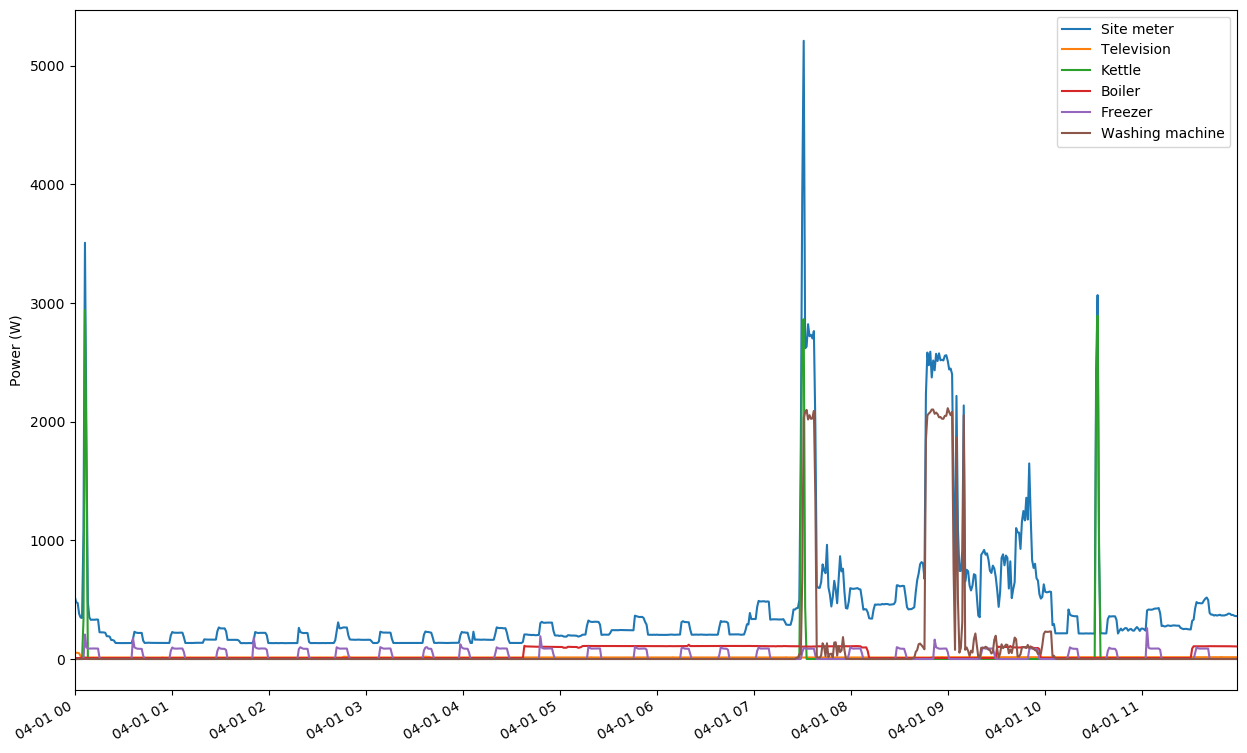

In [21]:
# Select Data based on specific time range
ukdale.set_window(start=START_TS,end=END_TS)
house_data = ukdale.buildings[4].elec

# Simple plot house 4 time series of the power consumption
house_data.plot()

### MetaGroup

Dataset consists of various grouping of electricty meters.  There is grouping type of appliances with its sampling rate, site meter for whole house, or appliance-level submeter, or a circuit-level submeter.  The NILMTK's design has consist of the key calss is **MeterGroup**. It stores a list of meters and allows to select subset of meters, aggregate power from all meters and many other functions.

To access MetaGroup objects, **nilmtk.global_meter_group**.  This holds every meter currently loaded.  There is one **MeterGroups** per building, it can access via **Building.elec** attribute.  There is also **nested MetaGroups** for aggregating togehter split-phase mains and dual-supply (240 volt) applliances in North American and Canadian datasets.  You can call the API **".nested_metergroups()"**.

In [22]:
print(house_data)

print("\nData Type for the variable of house_data is {}.".format(type(house_data)))

MeterGroup(meters=
  ElecMeter(instance=1, building=4, dataset='UK-DALE', site_meter, appliances=[])
  ElecMeter(instance=2, building=4, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1), Appliance(type='DVD player', instance=1), Appliance(type='set top box', instance=1), Appliance(type='light', instance=1)])
  ElecMeter(instance=3, building=4, dataset='UK-DALE', appliances=[Appliance(type='kettle', instance=1), Appliance(type='radio', instance=1)])
  ElecMeter(instance=4, building=4, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=5, building=4, dataset='UK-DALE', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])
)

Data Type for the variable of house_data is <class 'nilmtk.metergroup.MeterGroup'>.


In [23]:
house_data.mains()

ElecMeter(instance=1, building=4, dataset='UK-DALE', site_meter, appliances=[])

***WORKOUT!***

* There isn't any nested MetaGroups in this MeterGroup object.  You can try out and find out any nested group in other similiar object or change different house/building. On the other hand, you can also review the documentation of UK-DALE dataset.*

### Load all columns data (default) to a dataframe

This is to show ways of loading data from a NILMTK DataStore into the memory, as a dataframe.  The load function returns a generator of DataFrames loaded from the DataStore based on the conditions specified. If no conditions are specified, then all data from all the columns is loaded. This is a quick guide to [Python generators.](http://stackoverflow.com/a/1756156/732596)

In [24]:
#
# Load 'site_meter' (aggregated data) to variable "main_df" dataframe
#
# Sample Period is in second. It can be resampling to a specified period, eg 12, 24, 30 or 60.
# Default sample rate is 6 second per log
#
print(house_data[1])
main_df = next(house_data[1].load(sample_period=30))

main_df.head()

ElecMeter(instance=1, building=4, dataset='UK-DALE', site_meter, appliances=[])


physical_quantity,power
type,apparent
2013-04-01 00:00:00+01:00,433.600006
2013-04-01 00:00:30+01:00,625.000000
2013-04-01 00:01:00+01:00,476.799988
2013-04-01 00:01:30+01:00,482.000000
2013-04-01 00:02:00+01:00,482.600006


In [18]:
# Print all available meters and appliance in house 4

house_data.all_meters()

[ElecMeter(instance=1, building=4, dataset='UK-DALE', site_meter, appliances=[]),
 ElecMeter(instance=2, building=4, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1), Appliance(type='DVD player', instance=1), Appliance(type='set top box', instance=1), Appliance(type='light', instance=1)]),
 ElecMeter(instance=3, building=4, dataset='UK-DALE', appliances=[Appliance(type='kettle', instance=1), Appliance(type='radio', instance=1)]),
 ElecMeter(instance=4, building=4, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)]),
 ElecMeter(instance=5, building=4, dataset='UK-DALE', appliances=[Appliance(type='freezer', instance=1)]),
 ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])]

### Load only washing machine to dataframe

ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])
physical_quantity          power
type                      active
2013-04-01 00:00:05+01:00    0.0
2013-04-01 00:00:11+01:00    0.0
2013-04-01 00:00:17+01:00    0.0
2013-04-01 00:00:23+01:00    0.0
2013-04-01 00:00:29+01:00    0.0
...                          ...
2013-04-01 11:59:33+01:00    0.0
2013-04-01 11:59:39+01:00    0.0
2013-04-01 11:59:45+01:00    0.0
2013-04-01 11:59:51+01:00    0.0
2013-04-01 11:59:57+01:00    0.0

[7041 rows x 1 columns]


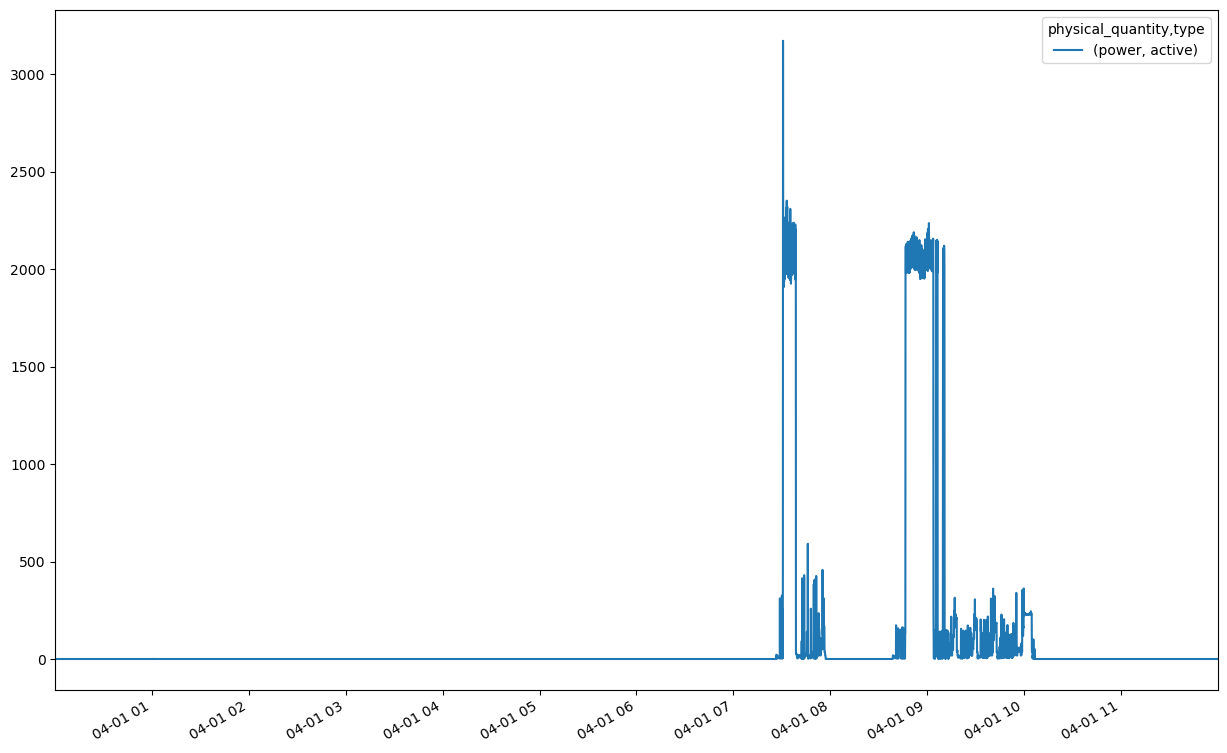

In [26]:
print(house_data['washing machine'])
df_wm = next(house_data['washing machine'].load())
print(df_wm)
df_wm.plot()

***WORKOUT!***

*You can practice to zoom to the interesting time zone, and further exploring the statistical analysis.*

In [20]:
df_wm.describe()

physical_quantity,power
type,active
count,7041.000000
mean,90.950714
std,398.856598
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3171.000000


***WORKOUT!***

*Various sampling rate setting may provide different slice-and-dice of the description.  It also can further the statistical analysis with std and mean.*

### Get column data and  load specfic column of data

This is to show how to extract specify column of data.  It picks washine machine as an example.  Thus, api '.available_columns' is to show all the columns name.

Also, it can load specific data to another data type, which is pandas series.  This utilize the API of '.power_series()'.  It provides a generator of one dimenstional pandas.Series objects, each containing power data.

In [21]:
# Get column header

obj_wm = house_data['washing machine']
obj_wm.available_columns()

[('power', 'active')]

In [22]:
series_wm = next(obj_wm.power_series())
series_wm.head()

2013-04-01 00:00:05+01:00    0.0
2013-04-01 00:00:11+01:00    0.0
2013-04-01 00:00:17+01:00    0.0
2013-04-01 00:00:23+01:00    0.0
2013-04-01 00:00:29+01:00    0.0
Name: (power, active), dtype: float32

***Notes:***

*Due to the current dataset only providing (power, active) single column value, therefore, it cannot specify other. It can do in below argument to the function.  If there is 'reactive', 'active' or 'voltage'. Below are the code reference.*

```
obj_tv = elec['television']

df = next(obj_tv.load(physical_quantity='voltage'))
df = next(obj_tv.load(physical_quantity='power', ac_type='reactive'))
df = next(obj_tv.load(ac_type='active'))
```

##  APIs of Stats for MeterGroups

### Using Pandas Series to perform simple analysis

**House  power consumption extract from "main" meter with simple plot**.

In [23]:
house_data.mains().power_series_all_data().head()

2013-04-01 00:00:05+01:00    431.0
2013-04-01 00:00:11+01:00    437.0
2013-04-01 00:00:17+01:00    436.0
2013-04-01 00:00:23+01:00    432.0
2013-04-01 00:00:29+01:00    432.0
Name: (power, apparent), dtype: float32

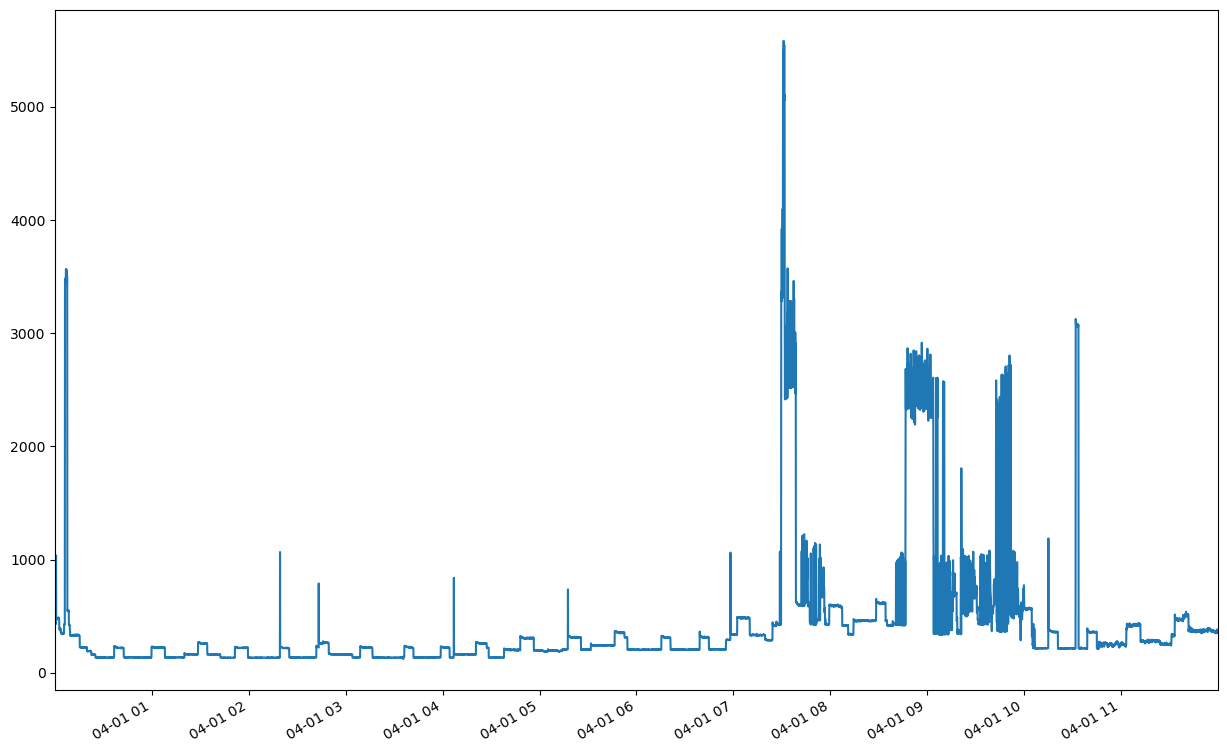

In [24]:
house_data.mains().power_series_all_data().plot()

In [25]:
start_dtts = dateutil.parser.parse(START_TS)
end_dtts = dateutil.parser.parse(END_TS)
delta_in_days = end_dtts - start_dtts

print("Start Date    : {}".format(START_TS))
print("End Date      : {}\n".format(END_TS))
print("Total of Hours (hr:min:sec)  = {}".format(delta_in_days))
print("Total of power consumption   = {:.2f}".format(house_data.mains().power_series_all_data().sum()))
print("Median of power consumption  = {:.2f}".format(house_data.mains().power_series_all_data().median()))
print("Average of power consumption = {:.2f}".format(house_data.mains().power_series_all_data().mean()))

Start Date    : 2013-04-01 00:00:00
End Date      : 2013-04-01 12:00:00

Total of Hours (hr:min:sec)  = 12:00:00
Total of power consumption   = 2953268.00
Median of power consumption  = 236.00
Average of power consumption = 420.10


***WORKOUT!***

*You can practice to create histogram chart to group by hours, and further exploring the statistical analysis.*

### Using NILMTK APIs to perform statistical analysis

This is to see the proportion of energy submetered in house/building 4

In [26]:
house_data.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.47063977997579187

In [27]:
house_data.available_ac_types('power')

['apparent', 'active']

In [28]:
house_data.mains().available_ac_types('power')

['apparent']

In [29]:
house_data.submeters().available_ac_types('power')

['active']

In [30]:
# Total Energy returns in 'kWh'

house_data.mains().total_energy() 

apparent    5.003591
dtype: float64

In [31]:
# Energy use per submeter

house_data.submeters().energy_per_meter()

5/5 ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])liance(type='light', instance=1)])

,"(2, 4, UK-DALE)","(3, 4, UK-DALE)","(4, 4, UK-DALE)","(5, 4, UK-DALE)","(6, 4, UK-DALE)"
active,0.165139,0.274928,0.536349,0.305463,1.073009
apparent,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN


# Your Summary and Finding

Let's exercise here, and further this initial data exploration with its analysis.  Then, you provide the summary and findings here. 

- Created Date: ??
- Updated Date: ??

**Findings:**
- ?
- ?
- ?